In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Ścieżki do danych
data_dir = "D:/labSem6/Obrazy2"
clean_data_dir = os.path.join(data_dir, "ObrazyCzyste")
noisy_data_dir = os.path.join(data_dir, "ObrazySzum")

# Wczytanie obrazów czystych
clean_images = os.listdir(clean_data_dir)
x_train_clean = []
for image_file in clean_images:
    image_path = os.path.join(clean_data_dir, image_file)
    image = plt.imread(image_path)
    x_train_clean.append(image)
x_train_clean = np.array(x_train_clean)

# Wczytanie obrazów zaszumionych
noisy_images = os.listdir(noisy_data_dir)
x_train_noisy = []
for image_file in noisy_images:
    image_path = os.path.join(noisy_data_dir, image_file)
    image = plt.imread(image_path)
    x_train_noisy.append(image)
x_train_noisy = np.array(x_train_noisy)

In [3]:
# Normalizacja danych
x_train_clean = x_train_clean / 255.0
x_train_noisy = x_train_noisy / 255.0

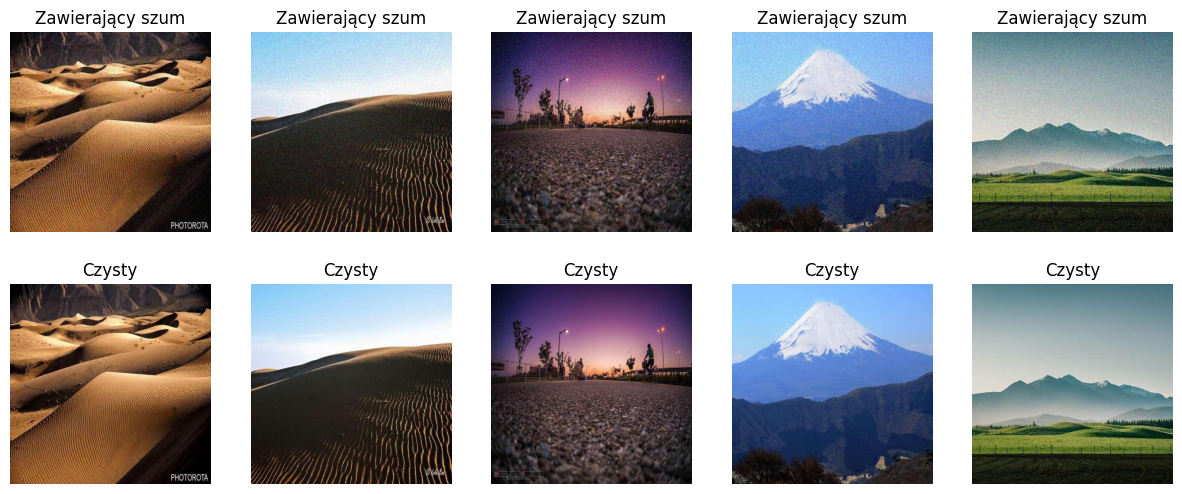

In [12]:
# Wybór 5 przykładów
selected_examples = x_train_noisy[:5]

# Wyświetlenie 5 obrazów (zawierających szum i czyste)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Wyświetlanie obrazów zawierających szum
for i, example in enumerate(selected_examples):
    axes[0, i].imshow(example)
    axes[0, i].axis('off')
    axes[0, i].set_title('Zawierający szum')

# Wyświetlanie czystych obrazów
for i, example in enumerate(selected_examples):
    clean_example = x_train_clean[i]
    axes[1, i].imshow(clean_example)
    axes[1, i].axis('off')
    axes[1, i].set_title('Czysty')

plt.show()

In [5]:

# Podział na zbiór treningowy i testowy
train_ratio = 0.8
x_train_clean, x_test_clean, x_train_noisy, x_test_noisy = train_test_split(x_train_clean, x_train_noisy,
                                                                            test_size=1 - train_ratio, random_state=42)

# Wyświetlenie informacji o liczbie obrazów treningowych i testowych
print("Liczba obrazów treningowych:", len(x_train_clean))
print("Liczba obrazów testowych:", len(x_test_clean))

Liczba obrazów treningowych: 806
Liczba obrazów testowych: 202


In [6]:
def create_model():
  x = tf.keras.Input(shape=(500, 500, 3))
# Encoder
  e_conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  pool1 = layers.MaxPooling2D((2, 2), padding='same')(e_conv1)
  batchnorm_1 = layers.BatchNormalization()(pool1)
  e_conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(batchnorm_1)
  pool2 = layers.MaxPooling2D((2, 2), padding='same')(e_conv2)
  batchnorm_2 = layers.BatchNormalization()(pool2)
  e_conv3 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(batchnorm_2)
  h = layers.MaxPooling2D((2, 2), padding='same')(e_conv3)
# Decoder
  d_conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(h)
  up1 = layers.UpSampling2D((2, 2))(d_conv1)
  d_conv2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
  up2 = layers.UpSampling2D((2, 2))(d_conv2)
  d_conv3 = layers.Conv2D(16, (3, 3), activation='relu')(up2)
  up3 = layers.UpSampling2D((2, 2))(d_conv3)
  r = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up3)
  model = tf.keras.Model(x, r)
  model.compile(optimizer='adam', loss='mse')
  return model
gaussian_auto_encoder = create_model()
gaussian_auto_encoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 32)     0     

In [7]:
gaussian_early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [8]:
# Trenowanie modelu
history = gaussian_auto_encoder.fit(x_train_noisy, x_train_clean, epochs=20, batch_size=32, validation_split=0.2, callbacks=[gaussian_early_stop])

Epoch 1/20
21/21 [==============================] - 305s 12s/step - loss: 0.0221 - val_loss: 0.0631
Epoch 2/20
21/21 [==============================] - 237s 11s/step - loss: 0.0120 - val_loss: 0.0574
Epoch 3/20
21/21 [==============================] - 230s 11s/step - loss: 0.0104 - val_loss: 0.0557
Epoch 4/20
21/21 [==============================] - 231s 11s/step - loss: 0.0099 - val_loss: 0.0568
Epoch 5/20
21/21 [==============================] - 231s 11s/step - loss: 0.0092 - val_loss: 0.0547
Epoch 6/20
21/21 [==============================] - 229s 11s/step - loss: 0.0091 - val_loss: 0.0569
Epoch 7/20
21/21 [==============================] - 230s 11s/step - loss: 0.0078 - val_loss: 0.0541
Epoch 8/20
21/21 [==============================] - 232s 11s/step - loss: 0.0077 - val_loss: 0.0533
Epoch 9/20
21/21 [==============================] - 231s 11s/step - loss: 0.0077 - val_loss: 0.0476
Epoch 10/20
21/21 [==============================] - 231s 11s/step - loss: 0.0079 - val_loss: 0.0434

In [9]:
# import pickle
# # Zapisanie modelu
# with open('model.pkl', 'wb') as file:
#     pickle.dump(autoencoder, file)

In [10]:
# # Odczytanie modelu
# with open('model.pkl', 'rb') as file:
#     autoencoder = pickle.load(file)

In [9]:
# Ocena modelu na danych testowych
loss = gaussian_auto_encoder.evaluate(x_test_noisy, x_test_clean)
print("Błąd rekonstrukcji na danych testowych:", loss)

7/7 [==============================] - 23s 2s/step - loss: 0.0231
Błąd rekonstrukcji na danych testowych: 0.023149019107222557


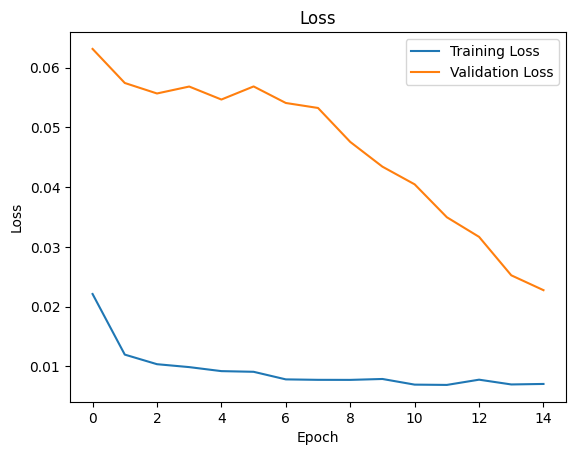

In [10]:
# Narysowanie wykresu straty
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 1s 1s/step


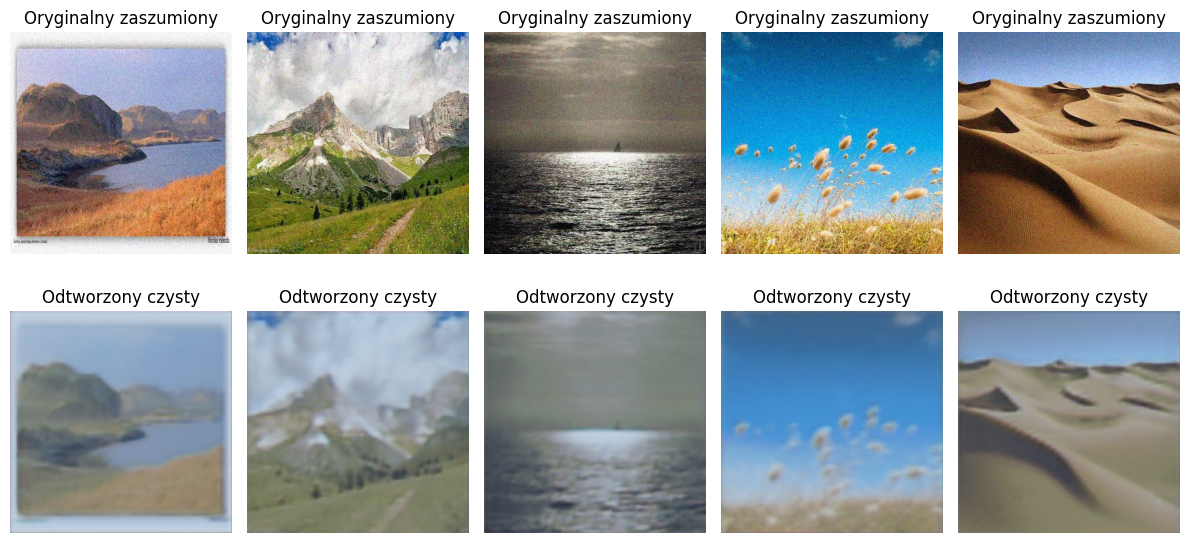

In [13]:

import numpy as np
from PIL import Image
import random

image_size = (500,500)
# Ścieżka do nowych obrazów zaszumionych
new_noisy_images_dir = "D:/labSem6/ObrazySzum1"

# Wczytanie nowych obrazów zaszumionych
x_new_noisy = []
for image_file in os.listdir(new_noisy_images_dir):
    image_path = os.path.join(new_noisy_images_dir, image_file)
    image = Image.open(image_path)
    image = image.resize((image_size[0], image_size[1]))  # Dopasowanie rozmiaru obrazu
    image = np.array(image)  # Konwersja na tablicę NumPy
    x_new_noisy.append(image)
x_new_noisy = np.array(x_new_noisy)

# Normalizacja nowych obrazów zaszumionych
x_new_noisy = x_new_noisy / 255.0

# Odtworzenie obrazów czystych z nowych obrazów zaszumionych
x_new_clean = gaussian_auto_encoder.predict(x_new_noisy)

# Wybór losowych 5 indeksów obrazów
random_indices = random.sample(range(len(x_new_noisy)), 5)
# Wyświetlanie obrazów przed i po odtwarzaniu
fig, axes = plt.subplots(nrows=2, ncols=len(random_indices), figsize=(12, 6))
for i, index in enumerate(random_indices):
    original_image = x_new_noisy[index]
    reconstructed_image = x_new_clean[index]

    # Oryginalny obraz zaszumiony
    axes[0, i].imshow(original_image)
    axes[0, i].set_title("Oryginalny zaszumiony")
    axes[0, i].axis("off")

    # Odtworzony obraz czysty
    axes[1, i].imshow(reconstructed_image)
    axes[1, i].set_title("Odtworzony czysty")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()